Tasks

If presented with a task such as these, the steps to follow are:
1. Load the customer data into a pandas DataFrame.
2. Preprocess the data, if necessary (e.g., normalize the variables, handle
missing values, etc.).
3. Visualize the data using a scatter plot to get an idea of the distribution
and potential clusters.
4. Choose the number of clusters (K) to use in the algorithm.
5. Initialize the centroids randomly.
6. Implement the two main steps of the K-Means algorithm (assigning
each data point to its closest centroid and recalculating the centroids)
in a loop until convergence.
7. Visualize the final clusters using a scatter plot, with different colors for
each cluster.
8. Interpret the results, and draw insights about the customer segments.
This task should give you a hands-on experience with the K-Means
algorithm, and help you understand how to apply it to real-world data.

In [9]:
#Step 1 Load data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the number of data points
N = 1000

# Generate the age of customers and annual income data for three distinct clusters
np.random.seed(0)
cluster_1 = np.column_stack((np.random.normal(35, 10,
N//3), np.random.normal(50_000, 10_000, N//3)))
cluster_2 = np.column_stack((np.random.normal(50, 10,
N//3), np.random.normal(80_000, 10_000, N//3)))
cluster_3 = np.column_stack((np.random.normal(65, 10,
N//3), np.random.normal(40_000, 10_000, N//3)))

# Combine the data into a single array
X = np.concatenate((cluster_1, cluster_2, cluster_3),
axis=0)

# Convert the array to a pandas DataFrame
df = pd.DataFrame(X, columns=['Age', 'Annual Income'])
# Print the first 5 rows of the data
print(df.head())

         Age  Annual Income
0  52.640523   38161.193598
1  39.001572   23408.277620
2  44.787380   56063.195244
3  57.408932   32441.094166
4  53.675580   54509.344618


In [7]:
#Step 2 :  Processing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

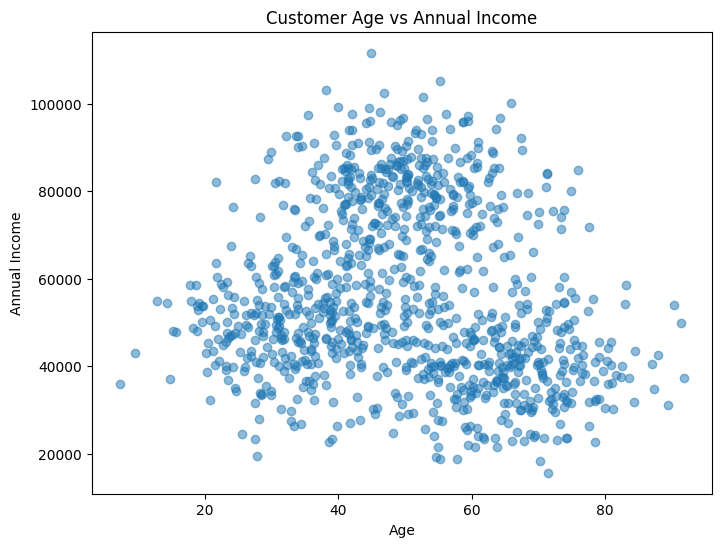

In [10]:
# Step 3 : Visualize the data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income'], alpha=0.5)
plt.title("Customer Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [11]:
# Step 4: Choose the number of clusters (K=3)
K = 3

In [12]:
# Step 5: Initialize the centroids randomly
centroids = X_scaled[np.random.choice(X_scaled.shape[0], K, replace=False)]

In [13]:
# Step 6: Implement K-Means algorithm
def k_means(X, K, centroids):
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0])
    while not np.all(centroids == prev_centroids):
        # Step 6.1: Assign each data point to the nearest centroid
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        prev_centroids = centroids.copy()

        # Step 6.2: Recalculate the centroids
        for i in range(K):
            centroids[i] = np.mean(X[labels == i], axis=0)

    return labels, centroids

# Run K-Means
labels, final_centroids = k_means(X_scaled, K, centroids)

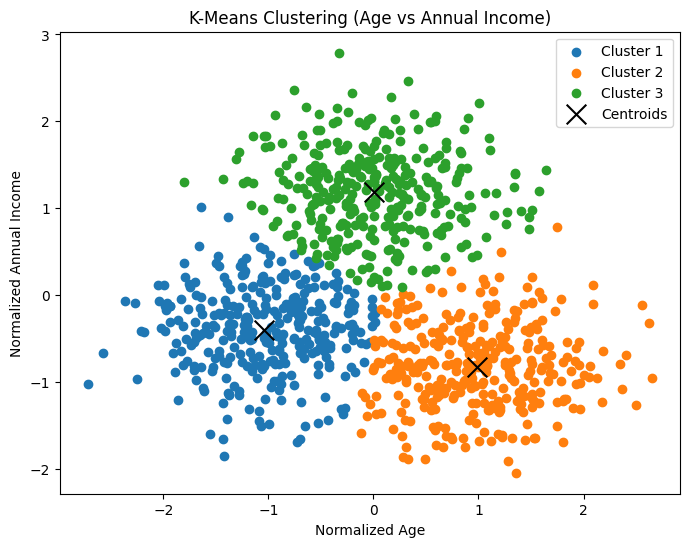

In [14]:
# Step 7: Visualize the final clusters
plt.figure(figsize=(8, 6))
for i in range(K):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering (Age vs Annual Income)")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Annual Income")
plt.legend()
plt.show()

In [15]:
# Step 8: Interpret the results
print("Final Centroids:")
print(final_centroids)

# Inverse transform to get the centroids back to original scale
final_centroids_original = scaler.inverse_transform(final_centroids)
print("\nCentroids in Original Scale (Age and Annual Income):")
print(final_centroids_original)

Final Centroids:
[[-1.04055357 -0.4009986 ]
 [ 0.98425156 -0.82552194]
 [ 0.00375546  1.18865628]]

Centroids in Original Scale (Age and Annual Income):
[[3.36885388e+01 4.83226495e+04]
 [6.55952575e+01 3.98889436e+04]
 [5.01446778e+01 7.99032024e+04]]
